## Assignment #8

In [73]:
# 1 - Import necessary libraries
import zipfile
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
with zipfile.ZipFile('CollegeScorecard_Raw_Data.zip', 'r') as zip_ref:
    zip_ref.extractall('College_Scorecard')

college_list = os.listdir('College_Scorecard/CollegeScorecard_Raw_Data')
print(college_list)

data_list = []
for x in range(len(college_list)):
  if college_list[x].find('MERGED') == False: 
    data_list.append(college_list[x])
  else:
    pass
print(data_list)  

['MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2012_13_PP.csv', 'data.yaml', 'MERGED2006_07_PP.csv', 'MERGED2011_12_PP.csv', 'Crosswalks.zip', 'MERGED2000_01_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2004_05_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2008_09_PP.csv', 'FieldOfStudyData1415_1516_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED2017_18_PP.csv', '.DS_Store', 'MERGED1998_99_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2018_19_PP.csv']
['MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2003_04_PP.

In [75]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
index = random.randint(0,21)
rand_df = data_list[index]
print(rand_df)

MERGED2008_09_PP.csv


In [76]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information
usecols = ["INSTNM", "TUITIONFEE_IN"]
final_df = pd.read_csv("College_Scorecard/CollegeScorecard_Raw_Data/"+rand_df, usecols=usecols)   

print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7055 entries, 0 to 7054
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7055 non-null   object 
 1   TUITIONFEE_IN  4209 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.4+ KB
None


In [77]:
# 5 - Find out how many observations have missing value.
print("Missing values:")
print(final_df.isnull().sum(), "\n")

Missing values:
INSTNM              0
TUITIONFEE_IN    2846
dtype: int64 



In [78]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
final_df = final_df.dropna(axis=0,how='any')
print(final_df.isnull().sum(), "\n")

INSTNM           0
TUITIONFEE_IN    0
dtype: int64 



In [79]:
# 7 - Find out how many observations have 0 tution.
print("0 values:")
final_df = final_df.replace(0, np.nan)
print(final_df.isnull().sum(), "\n")

0 values:
INSTNM           0
TUITIONFEE_IN    5
dtype: int64 



In [80]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
final_df = final_df.dropna(axis=0,how='any')
print(final_df.isnull().sum(), "\n")

INSTNM           0
TUITIONFEE_IN    0
dtype: int64 



In [81]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations
print("The mean of the data is:" , final_df['TUITIONFEE_IN'].mean())

The mean of the data is: 11388.439581351095


In [82]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.
index = random.randint(0,len(final_df['TUITIONFEE_IN']))
print(final_df['INSTNM'].iloc[index])
rand_obs = final_df['TUITIONFEE_IN'].iloc[index]
print(rand_obs)

Aria Health School of Nursing
10170.0


In [83]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
mean = round(final_df['TUITIONFEE_IN'].mean(),2)
difference = mean - rand_obs
print("Difference between observation and mean (obs<mean is positive, obs>mean is negative):" , difference)  

Difference between observation and mean (obs<mean is positive, obs>mean is negative): 1218.4400000000005


###### #12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

Step completed by re-running steps #10 and #11 several times


In [84]:
# 13 - Randomly select 20 observations, display the tuition of these observation.
temp_list = []
for x in range(0,20):
  index = random.randint(0,len(final_df['TUITIONFEE_IN']))
  rand_obs = final_df['TUITIONFEE_IN'].iloc[index]
  print(final_df['INSTNM'].iloc[index],":", rand_obs)
  temp_list.append(rand_obs)

Spring Hill College : 24240.0
Columbia-Greene Community College : 3496.0
Miami University-Middletown : 4350.0
Laredo College : 1716.0
Harrisburg Area Community College : 3285.0
Los Angeles Pierce College : 606.0
Bryan University : 9379.0
The Art Institute of Philadelphia : 22155.0
Delta School of Business and Technology : 10170.0
ITT Technical Institute-Murray : 16356.0
ATI College of Health : 32000.0
The Art Institute of Pittsburgh : 20430.0
University of Arizona : 5542.0
Nevada State College : 2951.0
Daemen College : 19870.0
Baton Rouge College : 7500.0
Warner Pacific University : 16000.0
ITT Technical Institute-Levittown : 16356.0
Carroll Community College : 2725.0
American International College : 24100.0


In [85]:
# 14 - Calculate and displat the mean tuition of these 20 observations
obs_sum = 0
for x in range(0,20):
  obs_sum = obs_sum + temp_list[x]
obs_mean = obs_sum / 20
print("The mean of the observations is:" , obs_mean)

The mean of the observations is: 12161.35


In [86]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
answer = round(obs_mean - mean,2)
print("Difference between 20 obs mean and overall mean (obs_mean>mean = pos, obs_mean<mean = neg:", answer)

Difference between 20 obs mean and overall mean (obs_mean>mean = pos, obs_mean<mean = neg: 772.91


###### #16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 

Compare these differences with the differences 
calculated earlier with just 1 observation

Describe your hunch/conclusion


My hunch is that overall most tuitions are relatively and their are a handful of schools that raise the overall mean tuition.

Write a function that take two input parameters:

> x (number of observations)

> y (the name of the dataframe).

The function will perform the following:

> Randomly select x observations from y

> Calculate the mean of these x observations

> Calculate the mean of all observations

> Calculate the difference between the two means

> Return the difference




In [87]:
# 17 - write function Code here
def calc_difference(num_obs,college_list):
  #randomly select num of observations
  index = random.randint(0,num_obs)
  
  #calculate the mean of x observations
  sum1 = 0
  for x in range(0,index):
    sum1 = sum1 + college_list[x]
  mean1 = sum1 / index
  
  #calculate mean of all observations
  sum2 = 0
  for x in range(0,num_obs):
    sum2 = sum2 + college_list[x]
  mean2 = sum2 / num_obs
 
  #calculate difference between 2 means
  difference = mean2 - mean1

  return difference

In [88]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
sample_list = final_df["TUITIONFEE_IN"].tolist()
calc_difference(20,sample_list)

-901.6875

In [98]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes = list(range(1,1001))
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [99]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed
means_diff = []
pop_mean = final_df['TUITIONFEE_IN'].mean()
for x in range(0,1000):
  random_sample = []
  sample_sum = 0
  for y in range(0,sample_sizes[x]):
    index = random.randint(0,(len(final_df)-1))
    random_sample.append(final_df['TUITIONFEE_IN'].iloc[index])
    sample_sum = sample_sum + random_sample[y]
  sample_mean = sample_sum / (x+1)
  test = pop_mean - sample_mean
  means_diff.append(test)
print(means_diff)

[8328.439581351095, 8433.439581351095, -3633.2270853155715, 1423.4395813510946, 3266.8395813510942, -6507.227085315573, -3104.4175615060485, -4789.935418648905, 2773.217359128872, 3874.039581351095, 2627.5304904420045, -487.89375198223934, 3940.3626582741717, 1139.8681527796653, 1932.5062480177621, 93.1895813510946, 449.4984048805072, 4058.1618035733172, -3526.3498923331153, 1604.539581351095, 2628.8681527796653, 1706.6213995329126, 685.3091465684865, -1400.2687519822393, 1996.5195813510945, -1993.0988801873664, -240.15301124149846, -1827.7747043631916, 788.474064109716, 560.2395813510939, -353.3346121972918, -184.1541686489054, 1064.2274601389727, 83.82193429227118, 1478.1538670653808, 2182.800692462206, -567.3442024326887, -2345.8498923331153, -3635.791187879675, 1953.8895813510953, 49.4395813510946, 651.9395813510946, 305.62562786272247, 2053.5532177147306, 1539.7951369066504, -2880.4299838662973, 529.0991558191799, 1449.9187480177607, 671.3987650245635, 293.65958135109395, -2202.50

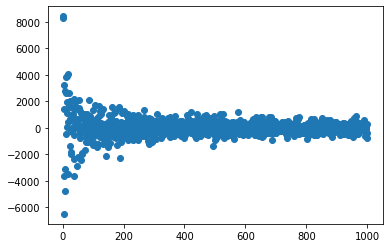

In [100]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
x = sample_sizes
y = means_diff
plt.scatter(x, y, marker='o');

##### # 22 - repeat 18 to 21 by replacing 50 with a larger number. 
For example, 300, or even 1000. and see how the plot looks

The end - Give yourself a pat on the back!